BeautifulSoup Yelp Ice Cream

In [1]:
#import packages
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import time
import random

In [2]:
#save all the urls you want crawl in a list by iterating through the pages of yelp results
url_list = []
for i in range(0,10):
    url_cur = 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=' + str(10*i)
    url_list.append(url_cur)

In [3]:
#show the list of urls
url_list

['https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=0',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=10',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=20',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=30',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=40',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=50',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=60',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=70',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=80',
 'https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start=90']

In [53]:
#create empty series to store the crawled data
ice_cream_shops=pd.DataFrame(columns=['Ranking','Name','Rating','#Reviews','Phone','Address','District'])
#iterate through all of the urls
for x in url_list:
    #use urllib2 module to open the url 
    ourUrl=urllib.request.urlopen(x)
    #create a BeautifulSoup object, which represents the current document as a nested data structure and parse the page
    soup=BeautifulSoup(ourUrl,'html.parser')
    #we iterate through each line of the soup and find the matching tags
    #for each object that we want to crawl, we search the corresponding tag in the soup and extract the data
    #we have to try and catch exceptions at tags that might be empty
    for i in soup.find_all('div',{'class':'lemon--div__373c0__1mboc largerScrollablePhotos__373c0__3FEIJ arrange__373c0__UHqhV border-color--default__373c0__2oFDT'}):  
        shop_name=i.find('a',{'class':'lemon--a__373c0__IEZFH link__373c0__29943 link-color--blue-dark__373c0__1mhJo link-size--inherit__373c0__2JXk5'})['name']  # extract shopname
        shop_rank=i.find('p').get_text()
        #extract only the relevant information from the rank (first two characters include the rank)
        shop_rank=str(shop_rank)[0:-(len(shop_name)+2)]
        try:
            shop_rating=i.find('span',{'class':'lemon--span__373c0__3997G display--inline__373c0__1DbOG border-color--default__373c0__2oFDT'}).find('div')['aria-label']
            shop_rating=str(shop_rating)[0:-12]
        except:
            shop_rating="None"
        try:
            shop_reviews=i.find('span', {'class':'lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_'}).get_text()
            shop_reviews=str(shop_reviews)[0:-7]
        except:
            shop_reviews="None"
        try:
            shop_phone=i.find('p',{'class':'lemon--p__373c0__3Qnnj text__373c0__2pB8f text-color--normal__373c0__K_MKN text-align--right__373c0__3ARv7'}).get_text()
        except:
            shop_phone="None"
        try:
            shop_address=i.find('address',{'class':'lemon--address__373c0__2sPac'}).get_text()
        except:
            shop_address="None"
        try:
            shop_district=i.find('div',{'class':'lemon--div__373c0__1mboc u-space-b1 border-color--default__373c0__2oFDT'}).find('p').get_text()
        except:
            shop_district="None"
        if len(shop_rank) != 0:
            s = pd.Series([shop_rank,shop_name,shop_rating,shop_reviews,shop_phone,shop_address,shop_district], index=['Ranking','Name','Rating','#Reviews','Phone','Address','District'])
            ice_cream_shops = ice_cream_shops.append(s, ignore_index = True)
#add a random sleep time to avoid getting blocked
time.sleep(3+1.2*random.random())

In [83]:
#list the results
ice_cream_shops

,Ranking,Name,Rating,#Reviews,Phone,Address,District
0,1,Van Leeuwen Artisan Ice Cream,4.5,12,(917) 388-2904,1250 6th Ave,Theater District
1,2,Van Leeuwen Ice Cream,4.5,23,(646) 368-9195,253 Columbus Ave,Upper West Side
2,3,Grom,4,594,(212) 974-3444,1796 Broadway,Midtown West
3,4,Emack and Bolio’s,4,286,(212) 362-2747,389 Amsterdam Ave,Upper West Side
4,5,Van Leeuwen Ice Cream Truck,3.5,118,(718) 701-1630,None,Upper West Side
5,6,Van Leeuwen Ice Cream,3.5,121,(646) 952-0311,448 Amsterdam Ave,Upper West Side
6,7,Forty Carrots,4,5,2085 Broadway,2085 Broadway,Upper West Side
7,8,CoolMess,4,154,(212) 355-9834,137 E 62nd St,Upper East Side
8,9,Mochidoki,3.5,23,(212) 684-0991,1000 S 8th Ave,Upper West Side
9,10,Ample Hills Creamery,4.5,348,(212) 582-9354,600 11th Ave,Hell's Kitchen


In [85]:
#store dataframe into a csv file 
ice_cream_shops.to_csv('IceCreamShops.csv')

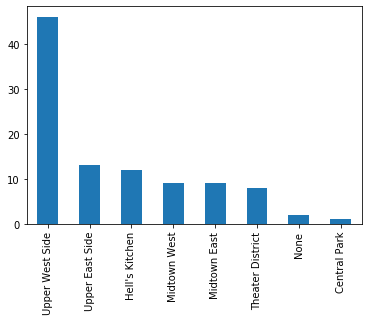

In [102]:
#show the distribution by district
%matplotlib inline
ice_cream_shops.District.value_counts().plot(kind="bar")

In [99]:
#convert the Rating column to numeric data type
ice_cream_shops['Rating']=pd.to_numeric(ice_cream_shops['Rating'])

In [100]:
#display the list
ice_cream_shops

,Ranking,Name,Rating,#Reviews,Phone,Address,District
0,1,Van Leeuwen Artisan Ice Cream,4.5,12,(917) 388-2904,1250 6th Ave,Theater District
1,2,Van Leeuwen Ice Cream,4.5,23,(646) 368-9195,253 Columbus Ave,Upper West Side
2,3,Grom,4.0,594,(212) 974-3444,1796 Broadway,Midtown West
3,4,Emack and Bolio’s,4.0,286,(212) 362-2747,389 Amsterdam Ave,Upper West Side
4,5,Van Leeuwen Ice Cream Truck,3.5,118,(718) 701-1630,None,Upper West Side
5,6,Van Leeuwen Ice Cream,3.5,121,(646) 952-0311,448 Amsterdam Ave,Upper West Side
6,7,Forty Carrots,4.0,5,2085 Broadway,2085 Broadway,Upper West Side
7,8,CoolMess,4.0,154,(212) 355-9834,137 E 62nd St,Upper East Side
8,9,Mochidoki,3.5,23,(212) 684-0991,1000 S 8th Ave,Upper West Side
9,10,Ample Hills Creamery,4.5,348,(212) 582-9354,600 11th Ave,Hell's Kitchen


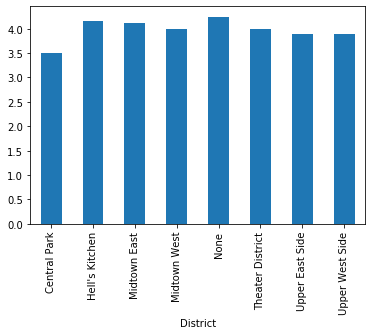

In [101]:
#show the plot of average rating for each of the districts
ice_cream_shops.groupby("District").Rating.agg("mean").plot(kind="bar")